Investigating terrain and forest cover affects on off-nadir GOES-16 ABI surface brightness temperatures in comparison with nadir looking Terra ASTER.

In [1]:
import xarray as xr
import rioxarray
import numpy as np
import matplotlib.pyplot as plt

Set plot font sizes

In [2]:
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


Set up working area geometry

In [3]:
# Larger area around Tuolumne further south and east to include Mammoth
(utm_e_UL, utm_n_UL) = 282500, 4205000
(utm_e_UR, utm_n_UR) = 305000, 4205000
(utm_e_LR, utm_n_LR) = 327500, 4160000
(utm_e_LL, utm_n_LL) = 305000, 4160000

geometry = [
    {
        'type': 'Polygon',
        'coordinates': [[
            [utm_e_UL, utm_n_UL],
            [utm_e_UR, utm_n_UR],
            [utm_e_LR, utm_n_LR],
            [utm_e_LL, utm_n_LL]
        ]]
    }
]

---
---
### Open dataset

In [4]:
ds = xr.open_dataset('/storage/spestana/ASTER-MODIS-GOES-DEM-FVEG_v4_orthorectified.nc')
ds = ds.rio.clip(geometry)

Plot all ASTER image from 2020-04-13 for context

In [5]:
# load visible image for 2020-04-13
ds_vis = xr.open_rasterio('/storage/spestana/ASTER/AST_L1T/geotiff/V/AST_L1T_00304132020185117_20200414091306_12717_V.tif')

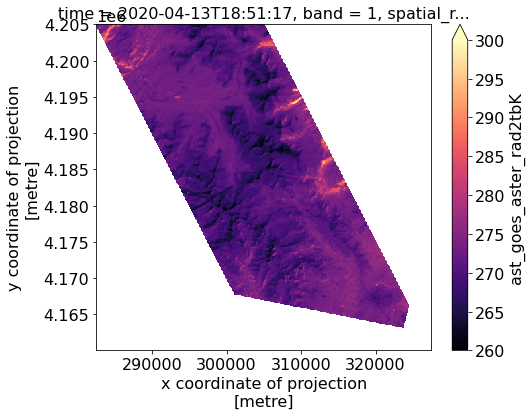

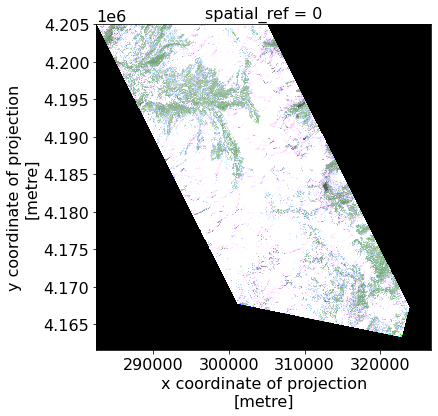

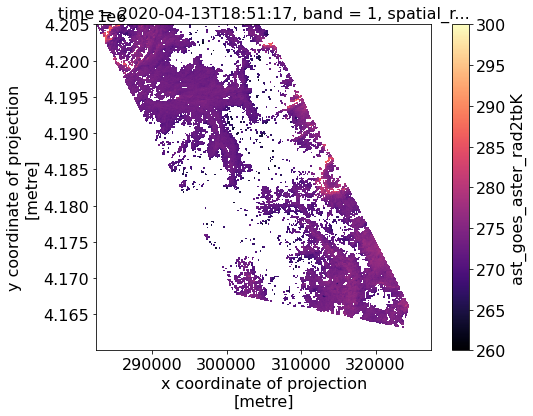

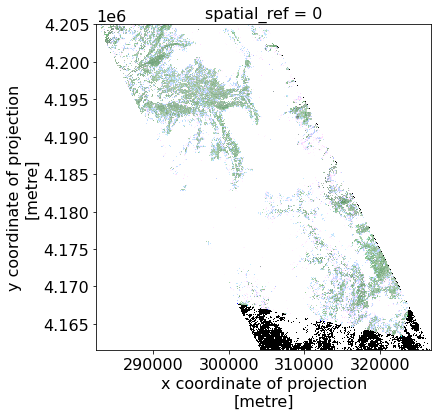

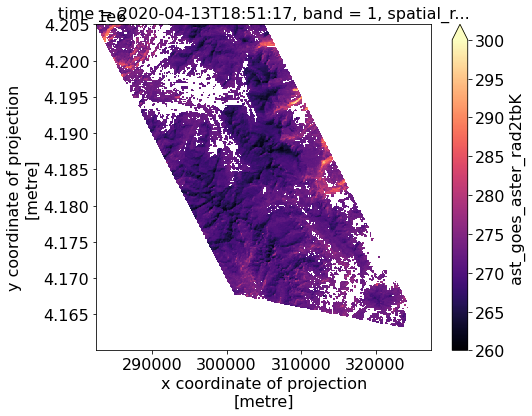

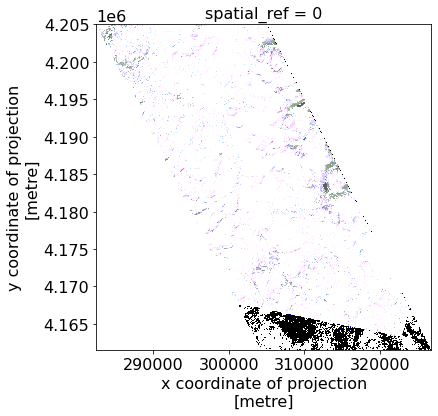

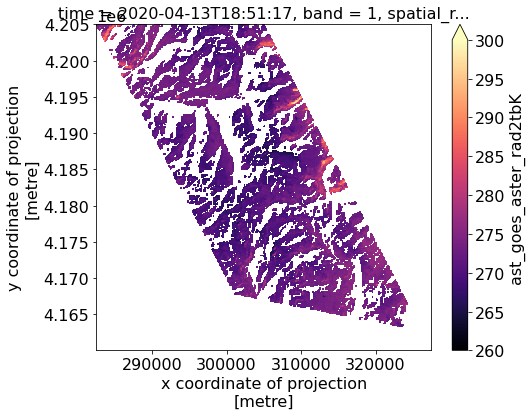

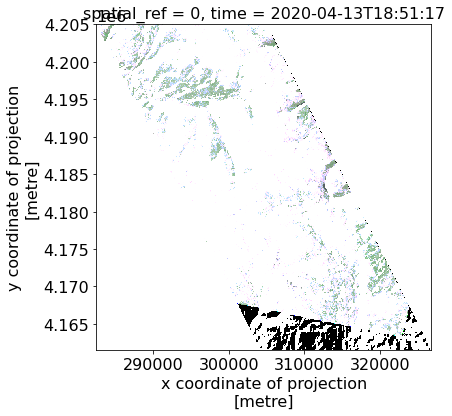

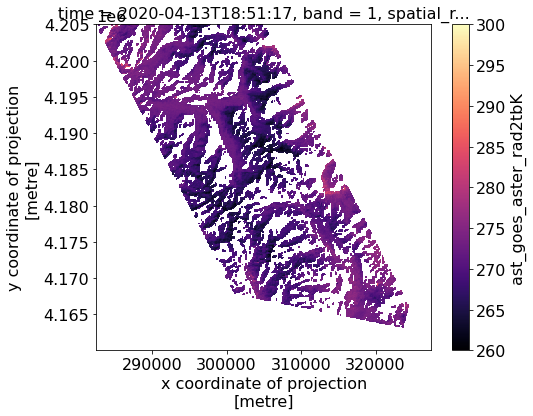

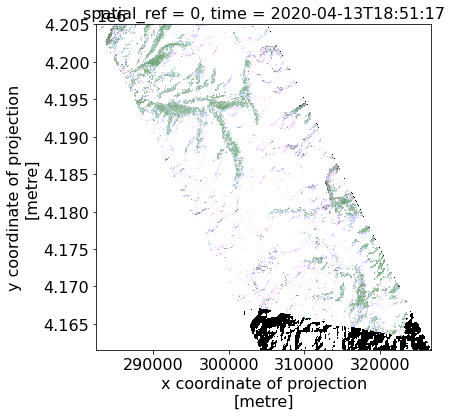

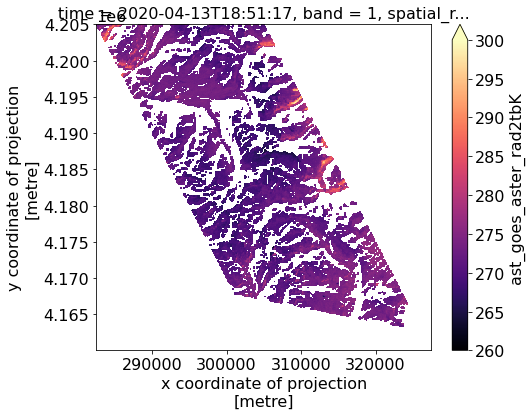

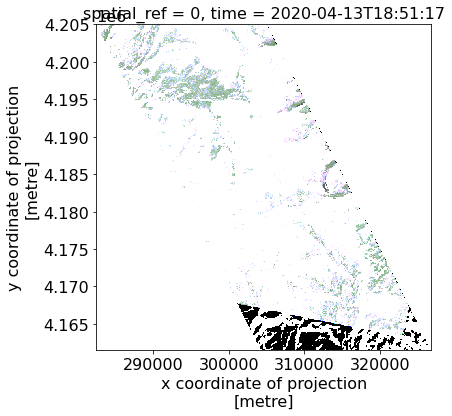

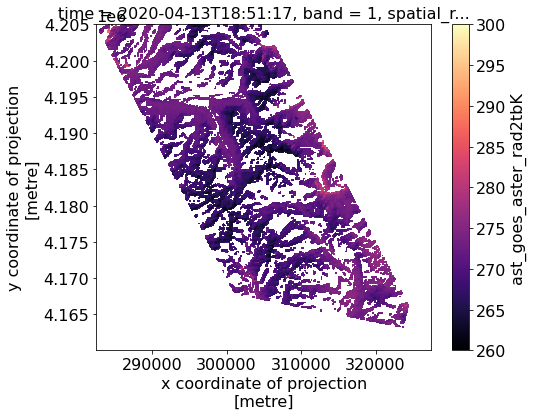

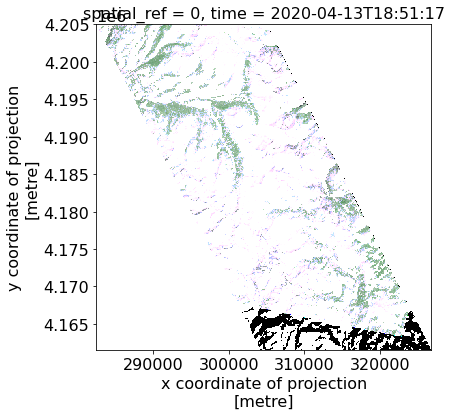

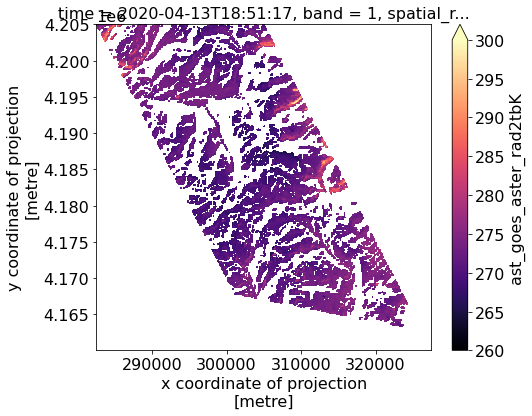

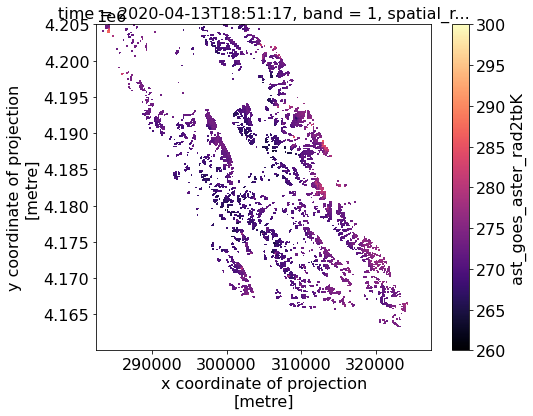

In [35]:
i = 26
plt.figure(figsize=(7.5,6))
ds.isel(time=i).ast_goes_aster_rad2tbK.plot(cmap='magma',vmin=260,vmax=300)
plt.figure(figsize=(6,6))
ds_vis.rio.clip(geometry).plot.imshow(rgb="band", vmin=0,vmax=255)

### TCC
k_tcc = 0
# plot where tcc > threshold
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.tcc > k_tcc).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
plt.figure(figsize=(6,6))
ds_vis.rio.clip(geometry).where(ds.tcc > k_tcc).plot.imshow(rgb="band", vmin=0,vmax=255)
# plot where tcc < threshold
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.tcc <= k_tcc).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
plt.figure(figsize=(6,6))
ds_vis.rio.clip(geometry).where(ds.tcc <= k_tcc).plot.imshow(rgb="band", vmin=0,vmax=255)

### SAT HILLSHADE
xx = ds.sat_hillshade.isel(time=i).values.ravel()
xx = xx[~np.isnan(xx)] # remove nans
k_sat_hillshade = np.quantile(xx, 0.50) # median
# plot where sat_hillshade > threshold
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) > k_sat_hillshade).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
plt.figure(figsize=(6,6))
ds_vis.rio.clip(geometry).where(ds.sat_hillshade.isel(time=i) > k_sat_hillshade).plot.imshow(rgb="band", vmin=0,vmax=255)
# plot where sat_hillshade < threshold
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) <= k_sat_hillshade).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
plt.figure(figsize=(6,6))
ds_vis.rio.clip(geometry).where(ds.sat_hillshade.isel(time=i) <= k_sat_hillshade).plot.imshow(rgb="band", vmin=0,vmax=255)

### SOLAR HILLSHADE
xx = ds.solar_hillshade.isel(time=i).values.ravel()
xx = xx[~np.isnan(xx)] # remove nans
k_solar_hillshade = np.quantile(xx, 0.50) # median
# plot where solar_hillshade > threshold
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade.isel(time=i) > k_solar_hillshade).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
plt.figure(figsize=(6,6))
ds_vis.rio.clip(geometry).where(ds.solar_hillshade.isel(time=i) > k_solar_hillshade).plot.imshow(rgb="band", vmin=0,vmax=255)
# plot where solar_hillshade < threshold
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade.isel(time=i) <= k_solar_hillshade).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
plt.figure(figsize=(6,6))
ds_vis.rio.clip(geometry).where(ds.solar_hillshade.isel(time=i) <= k_solar_hillshade).plot.imshow(rgb="band", vmin=0,vmax=255)

#####
##### What fraction of the area is satellite-facing and sun-facing?
# plot where solar_hillshade > threshold, and sat_hillshade > threshold
# satellite-facing that is also sun-facing
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) > k_sat_hillshade).where(ds.solar_hillshade.isel(time=i) > k_solar_hillshade).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
gt_k = ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) > k_sat_hillshade).where(ds.solar_hillshade.isel(time=i) > k_solar_hillshade).isel(time=i).values.ravel()
# satellite-facing that is not-sun-facing
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) > k_sat_hillshade).where(ds.solar_hillshade.isel(time=i) <= k_solar_hillshade).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
lt_k = ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) > k_sat_hillshade).where(ds.solar_hillshade.isel(time=i) <= k_solar_hillshade).isel(time=i).values.ravel()





In [33]:
gt_k = gt_k[~np.isnan(gt_k)]
lt_k = lt_k[~np.isnan(lt_k)]

print(len(gt_k),len(lt_k))
print('fraction of satellite-facing area that is also sun-facing', 100*np.round(len(gt_k) / (len(gt_k)+len(lt_k)),2))

46510 9039
fraction of satellite-facing area that is also sun-facing 84.0


---
### Tree Canopy Cover

Make two zones based on TCC, using the median as the threshold between the two groups. Then look at ASTER temperatures within each zone, and surface temperature biases (ABI-ASTER) within each zone.

What is the median TCC? (ignoring zeros)

In [7]:
xx = ds.tcc.values.ravel()
xx = xx[~np.isnan(xx)] # remove nans
xx = xx[xx!=0] # remove zeros
np.quantile(xx, 0.50) # median

38.0

ASTER surface brightness temperatures:

In [8]:
gt_k = [] # greater than threshold, k
lt_k = [] # less than threshold, k
ks = [] # threshold values for each image
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 0:
        ## find the 50% quantile (median) (or some other quantile) and use that as the threshold
        #xx = ds.tcc.values.ravel()
        #xx = xx[~np.isnan(xx)] # remove nans
        #xx = xx[xx!=0] # remove zeros
        k = 0 #np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        ks.append(k)
        gt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.tcc > k).isel(time=i).values.ravel())
        lt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.tcc <= k).isel(time=i).values.ravel())

number of pixels:  35270 74725
means:  273.3 270.3
mean diff: 3.0
medians:  273.3 270.3


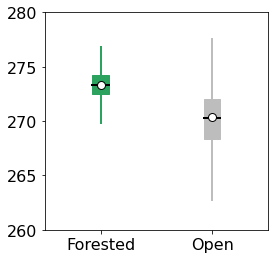

In [9]:
n=26

gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
lt_k_n = lt_k[n][~np.isnan(lt_k[n])]


plt.figure(figsize=(4,4))

bplot = plt.boxplot([gt_k_n, 
                     lt_k_n],
                     showfliers=False, showmeans=True, patch_artist=True,
                     labels=['Forested', 'Open']);


color1='#2ca25f'
color2='#bdbdbd'
# fill with colors
colors = [color1, color2]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_edgecolor(color)
    patch.set_facecolor(color)
colors = ['k', 'k']
for patch, color in zip(bplot['medians'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['means'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markerfacecolor('w')
    patch.set_marker('o')
    patch.set_markersize(8)
for patch, color in zip(bplot['fliers'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markersize(1)
    patch.set_marker('.')
colors = [color1, color1, color2, color2]
for patch, color in zip(bplot['whiskers'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['caps'], colors):
    patch.set_color(color)
    patch.set_linewidth(0)
    
    
    
#plt.title(times[n])
plt.ylim(260,280);

print('number of pixels: ',len(gt_k_n),len(lt_k_n))
print('means: ',np.round(np.mean(gt_k_n),1),np.round(np.mean(lt_k_n),1))
print(f'mean diff: {np.round(np.mean(gt_k_n)-np.mean(lt_k_n),1)}')
print('medians: ',np.round(np.median(gt_k_n),1),np.round(np.median(lt_k_n),1))

In [10]:
#for n, _ in enumerate(ds.time.values):
#    gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
#    lt_k_n = lt_k[n][~np.isnan(lt_k[n])]
#
#    #print(len(gt_k_n),len(lt_k_n))
#    plt.figure()
#    plt.boxplot([gt_k_n, 
#                lt_k_n], showfliers=False, showmeans=True);
#    plt.title(times[n])
#    #plt.ylim(250,300);

ABI-ASTER surface brightness temperature differences:

In [11]:
gt_k = [] # greater than threshold, k
lt_k = [] # less than threshold, k
ks = [] # threshold values for each image
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 0:
        ## find the 50% quantile (median) (or some other quantile) and use that as the threshold
        #xx = ds.tcc.values.ravel()
        #xx = xx[~np.isnan(xx)] # remove nans
        #xx = xx[xx!=0] # remove zeros
        k = 0 #np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        ks.append(k)
        gt_k.append(ds.ast_goes_mean_diff_tb.where(ds.tcc > k).isel(time=i).values.ravel())
        lt_k.append(ds.ast_goes_mean_diff_tb.where(ds.tcc <= k).isel(time=i).values.ravel())

number of pixels:  35270 74725
means:  2.6 2.5
mean diff: 0.1
medians:  2.7 2.5


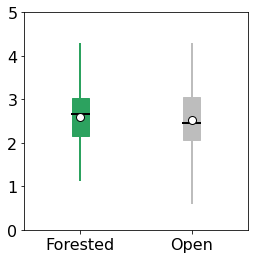

In [12]:
n=26

gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
lt_k_n = lt_k[n][~np.isnan(lt_k[n])]


plt.figure(figsize=(4,4))

bplot = plt.boxplot([gt_k_n, 
                     lt_k_n],
                     showfliers=False, showmeans=True, patch_artist=True,
                     labels=['Forested', 'Open']);


color1='#2ca25f'
color2='#bdbdbd'
# fill with colors
colors = [color1, color2]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_edgecolor(color)
    patch.set_facecolor(color)
colors = ['k', 'k']
for patch, color in zip(bplot['medians'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['means'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markerfacecolor('w')
    patch.set_marker('o')
    patch.set_markersize(8)
for patch, color in zip(bplot['fliers'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markersize(1)
    patch.set_marker('.')
colors = [color1, color1, color2, color2]
for patch, color in zip(bplot['whiskers'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['caps'], colors):
    patch.set_color(color)
    patch.set_linewidth(0)
    
    
    
#plt.title(times[n])
plt.ylim(0,5);

print('number of pixels: ',len(gt_k_n),len(lt_k_n))
print('means: ',np.round(np.mean(gt_k_n),1),np.round(np.mean(lt_k_n),1))
print(f'mean diff: {np.round(np.mean(gt_k_n)-np.mean(lt_k_n),1)}')
print('medians: ',np.round(np.median(gt_k_n),1),np.round(np.median(lt_k_n),1))

In [13]:
#for n, _ in enumerate(ds.time.values):
#    gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
#    lt_k_n = lt_k[n][~np.isnan(lt_k[n])]
#
#    #print(len(gt_k_n),len(lt_k_n))
#    plt.figure()
#    plt.boxplot([gt_k_n, 
#                lt_k_n], showfliers=False, showmeans=True);
#    plt.title(times[n])
#    #plt.ylim(-10,10);

While the trees (ASTER temperatures where tcc>0) do appear warmer in many of the images (both day and night it seems), the ABI-ASTER biases between trees and no trees seem both about the same in each image (note, these biases are computed from the upscaled ABI resolution ASTER, so we don't really have the spatial resolution to see much of anything anyways, this second set of plots is probably not very useful)

---
### Terrain

Make two zones based on the terrain hillshade from the satellite's point of view, where brighter terrain (1) means that the satellite's line of sight is normal to the land surface, grey (0) means that the angle is perpendicular, and black (-1) is facing the opposite direction.

Again, use the median hillshade value as the threshold between the two groups. Then look at ASTER temperatures within each zone, and surface temperature biases (ABI-ASTER) within each zone.

What is the median hillshade (satellite) value?

In [14]:
xx = ds.sat_hillshade.isel(time=26).values.ravel()
xx = xx[~np.isnan(xx)] # remove nans
np.quantile(xx, 0.50) # median

0.4484842969197002

ASTER surface brightness temperatures:

In [15]:
gt_k = [] # greater than threshold, k
lt_k = [] # less than threshold, k
ks = [] # threshold values for each image
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 0:
        # find the 50% quantile (median) (or some other quantile) and use that as the threshold
        xx = ds.sat_hillshade.isel(time=i).values.ravel()
        xx = xx[~np.isnan(xx)] # remove nans
        k = np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        ks.append(k)
        gt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade > k).isel(time=i).values.ravel())
        lt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade <= k).isel(time=i).values.ravel())

number of pixels:  55549 54227
means:  272.3 270.3
mean diff: 2.0
medians:  272.1 270.7


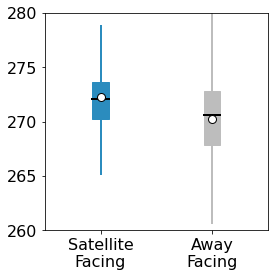

In [16]:
n=26

gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
lt_k_n = lt_k[n][~np.isnan(lt_k[n])]


plt.figure(figsize=(4,4))

bplot = plt.boxplot([gt_k_n, 
                     lt_k_n],
                     showfliers=False, showmeans=True, patch_artist=True,
                     labels=['Satellite\nFacing', 'Away\nFacing']);


color1='#2b8cbe'
color2='#bdbdbd'
# fill with colors
colors = [color1, color2]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_edgecolor(color)
    patch.set_facecolor(color)
colors = ['k', 'k']
for patch, color in zip(bplot['medians'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['means'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markerfacecolor('w')
    patch.set_marker('o')
    patch.set_markersize(8)
for patch, color in zip(bplot['fliers'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markersize(1)
    patch.set_marker('.')
colors = [color1, color1, color2, color2]
for patch, color in zip(bplot['whiskers'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['caps'], colors):
    patch.set_color(color)
    patch.set_linewidth(0)
    
    
    
#plt.title(times[n])
plt.ylim(260,280);

print('number of pixels: ',len(gt_k_n),len(lt_k_n))
print('means: ',np.round(np.mean(gt_k_n),1),np.round(np.mean(lt_k_n),1))
print(f'mean diff: {np.round(np.mean(gt_k_n)-np.mean(lt_k_n),1)}')
print('medians: ',np.round(np.median(gt_k_n),1),np.round(np.median(lt_k_n),1))

In [17]:
#for n, _ in enumerate(ds.time.values):
#    gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
#    lt_k_n = lt_k[n][~np.isnan(lt_k[n])]
#
#    #print(len(gt_k_n),len(lt_k_n))
#    plt.figure()
#    plt.boxplot([gt_k_n, 
#                lt_k_n], showfliers=False, showmeans=True);
#    plt.title(times[n])
#    #plt.ylim(250,300);

ABI-ASTER surface brightness temperature differences:

In [18]:
gt_k = [] # greater than threshold, k
lt_k = [] # less than threshold, k
ks = [] # threshold values for each image
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 0:
        # find the 50% quantile (median) (or some other quantile) and use that as the threshold
        xx = ds.sat_hillshade.isel(time=i).values.ravel()
        xx = xx[~np.isnan(xx)] # remove nans
        k = np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        ks.append(k)
        gt_k.append(ds.ast_goes_mean_diff_tb.where(ds.sat_hillshade > k).isel(time=i).values.ravel())
        lt_k.append(ds.ast_goes_mean_diff_tb.where(ds.sat_hillshade <= k).isel(time=i).values.ravel())

number of pixels:  55549 54227
means:  2.5 2.6
mean diff: -0.2
medians:  2.4 2.6


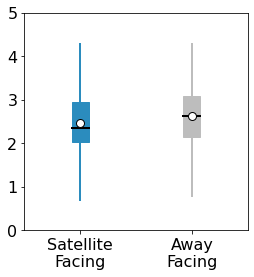

In [19]:
n=26

gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
lt_k_n = lt_k[n][~np.isnan(lt_k[n])]


plt.figure(figsize=(4,4))

bplot = plt.boxplot([gt_k_n, 
                     lt_k_n],
                     showfliers=False, showmeans=True, patch_artist=True,
                     labels=['Satellite\nFacing', 'Away\nFacing']);


color1='#2b8cbe'
color2='#bdbdbd'
# fill with colors
colors = [color1, color2]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_edgecolor(color)
    patch.set_facecolor(color)
colors = ['k', 'k']
for patch, color in zip(bplot['medians'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['means'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markerfacecolor('w')
    patch.set_marker('o')
    patch.set_markersize(8)
for patch, color in zip(bplot['fliers'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markersize(1)
    patch.set_marker('.')
colors = [color1, color1, color2, color2]
for patch, color in zip(bplot['whiskers'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['caps'], colors):
    patch.set_color(color)
    patch.set_linewidth(0)
    
    
    
#plt.title(times[n])
plt.ylim(0,5);

print('number of pixels: ',len(gt_k_n),len(lt_k_n))
print('means: ',np.round(np.mean(gt_k_n),1),np.round(np.mean(lt_k_n),1))
print(f'mean diff: {np.round(np.mean(gt_k_n)-np.mean(lt_k_n),1)}')
print('medians: ',np.round(np.median(gt_k_n),1),np.round(np.median(lt_k_n),1))

In [20]:
#for n, _ in enumerate(ds.time.values):
#    gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
#    lt_k_n = lt_k[n][~np.isnan(lt_k[n])]
#
#    #print(len(gt_k_n),len(lt_k_n))
#    plt.figure()
#    plt.boxplot([gt_k_n, 
#                lt_k_n], showfliers=False, showmeans=True);
#    plt.title(times[n])
#    #plt.ylim(-10,10);

---
### Sun + Terrain

Make two zones based on the terrain hillshade from the sun.

Again, use the median hillshade value as the threshold between the two groups. Then look at ASTER temperatures within each zone, and surface temperature biases (ABI-ASTER) within each zone.

What is the median hillshade (solar) value (daytime)?

In [21]:
xx = ds.solar_hillshade.isel(time=26).values.ravel()
xx = xx[~np.isnan(xx)] # remove nans
np.quantile(xx, 0.50) # median

0.8358289208945802

ASTER surface brightness temperatures:

In [22]:
gt_k = [] # greater than threshold, k
lt_k = [] # less than threshold, k
ks = [] # threshold values for each image
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 0:
        # find the 50% quantile (median) (or some other quantile) and use that as the threshold
        xx = ds.solar_hillshade.isel(time=i).values.ravel()
        xx = xx[~np.isnan(xx)] # remove nans
        k = np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        ks.append(k)
        gt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade > k).isel(time=i).values.ravel())
        lt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade <= k).isel(time=i).values.ravel())

number of pixels:  54822 54954
means:  272.3 270.3
mean diff: 1.9
medians:  272.1 270.7


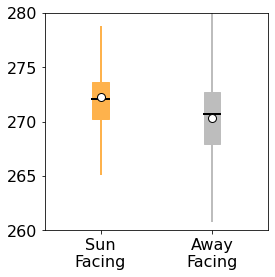

In [23]:
n=26

gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
lt_k_n = lt_k[n][~np.isnan(lt_k[n])]


plt.figure(figsize=(4,4))

bplot = plt.boxplot([gt_k_n, 
                     lt_k_n],
                     showfliers=False, showmeans=True, patch_artist=True,
                     labels=['Sun\nFacing', 'Away\nFacing']);


color1='#feb24c'
color2='#bdbdbd'
# fill with colors
colors = [color1, color2]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_edgecolor(color)
    patch.set_facecolor(color)
colors = ['k', 'k']
for patch, color in zip(bplot['medians'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['means'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markerfacecolor('w')
    patch.set_marker('o')
    patch.set_markersize(8)
for patch, color in zip(bplot['fliers'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markersize(1)
    patch.set_marker('.')
colors = [color1, color1, color2, color2]
for patch, color in zip(bplot['whiskers'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['caps'], colors):
    patch.set_color(color)
    patch.set_linewidth(0)
    
    
    
#plt.title(times[n])
plt.ylim(260,280);

print('number of pixels: ',len(gt_k_n),len(lt_k_n))
print('means: ',np.round(np.mean(gt_k_n),1),np.round(np.mean(lt_k_n),1))
print(f'mean diff: {np.round(np.mean(gt_k_n)-np.mean(lt_k_n),1)}')
print('medians: ',np.round(np.median(gt_k_n),1),np.round(np.median(lt_k_n),1))

In [24]:
#for n in range(0,len(times)):
#    gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
#    lt_k_n = lt_k[n][~np.isnan(lt_k[n])]
#
#    #print(len(gt_k_n),len(lt_k_n))
#    plt.figure()
#    plt.boxplot([gt_k_n, 
#                lt_k_n], showfliers=False, showmeans=True);
#    plt.title(times[n])
#    #plt.ylim(-10,10);

---

### Combination of Solar- and Satellite-Facing Terrain

In [37]:
gtsolar_gtsat_k = []
gtsolar_ltsat_k = [] 
ltsolar_ltsat_k = []
ltsolar_gtsat_k = []
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 0:
        # find the 50% quantile (median) (or some other quantile) and use that as the threshold
        xx = ds.solar_hillshade.isel(time=i).values.ravel()
        xx = xx[~np.isnan(xx)] # remove nans
        solar_k = np.quantile(xx, 0.50) # median
        xx = ds.sat_hillshade.isel(time=i).values.ravel()
        xx = xx[~np.isnan(xx)] # remove nans
        sat_k = np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        gtsolar_gtsat_k.append(ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade > solar_k).where(ds.sat_hillshade > sat_k).isel(time=i).values.ravel())
        gtsolar_ltsat_k.append(ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade > solar_k).where(ds.sat_hillshade <= sat_k).isel(time=i).values.ravel())
        ltsolar_ltsat_k.append(ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade <= solar_k).where(ds.sat_hillshade <= sat_k).isel(time=i).values.ravel())
        ltsolar_gtsat_k.append(ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade <= solar_k).where(ds.sat_hillshade > sat_k).isel(time=i).values.ravel())

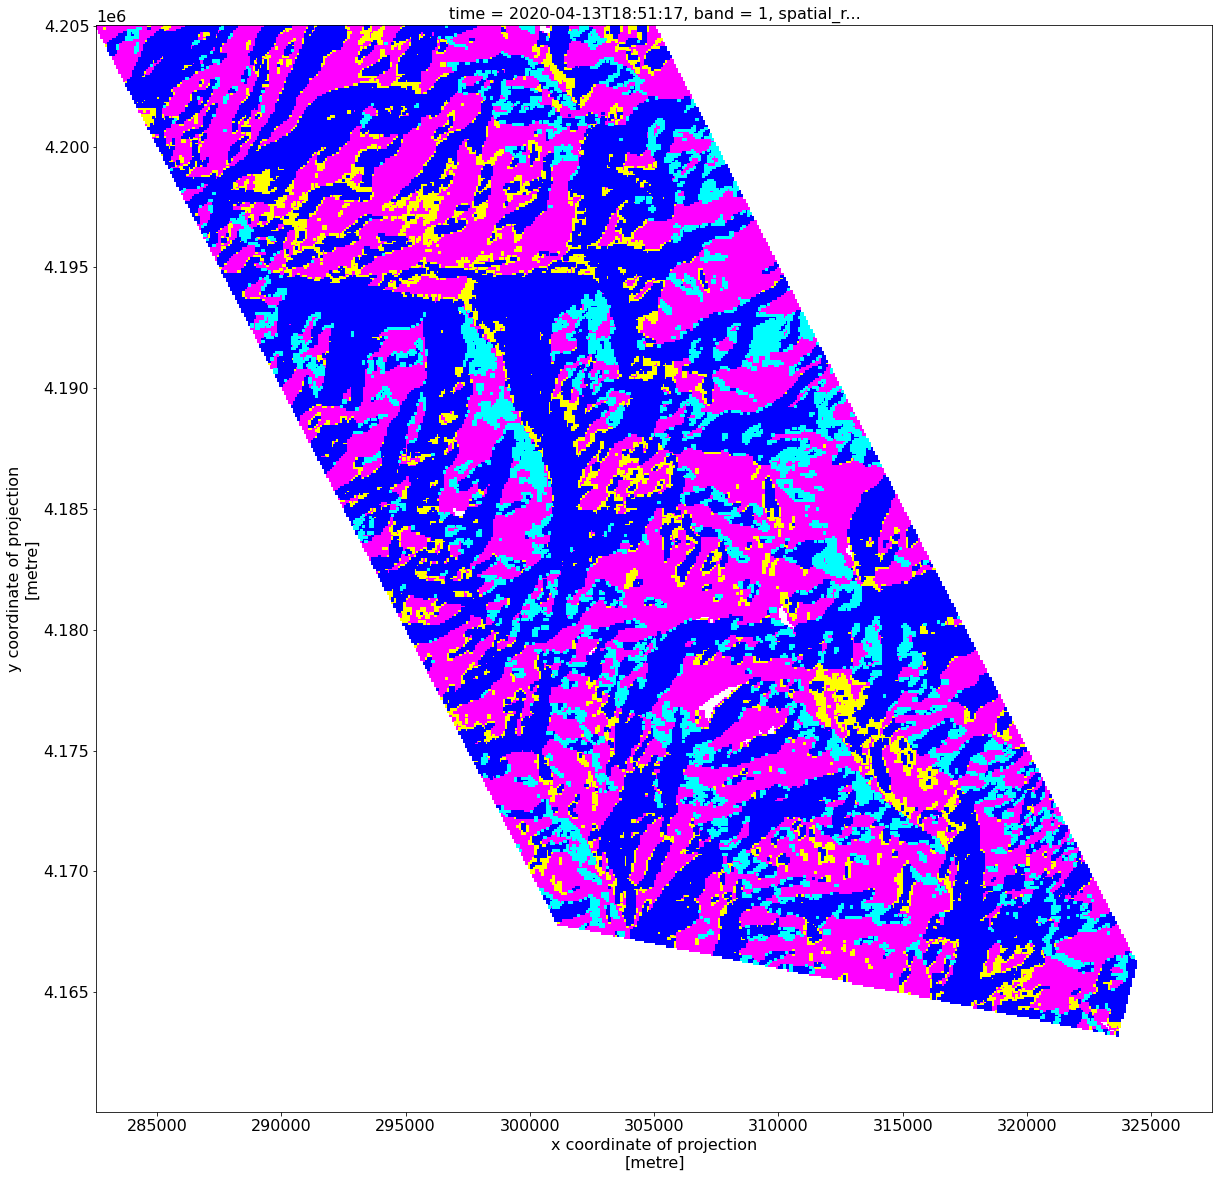

In [68]:
plt.figure(figsize=(20,20))

# magenta
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade > solar_k).where(ds.sat_hillshade > sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='spring')
# yellow
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade > solar_k).where(ds.sat_hillshade <= sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='spring_r')
# blue/purple
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade <= solar_k).where(ds.sat_hillshade <= sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='winter')
# cyan
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade <= solar_k).where(ds.sat_hillshade > sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='cool')



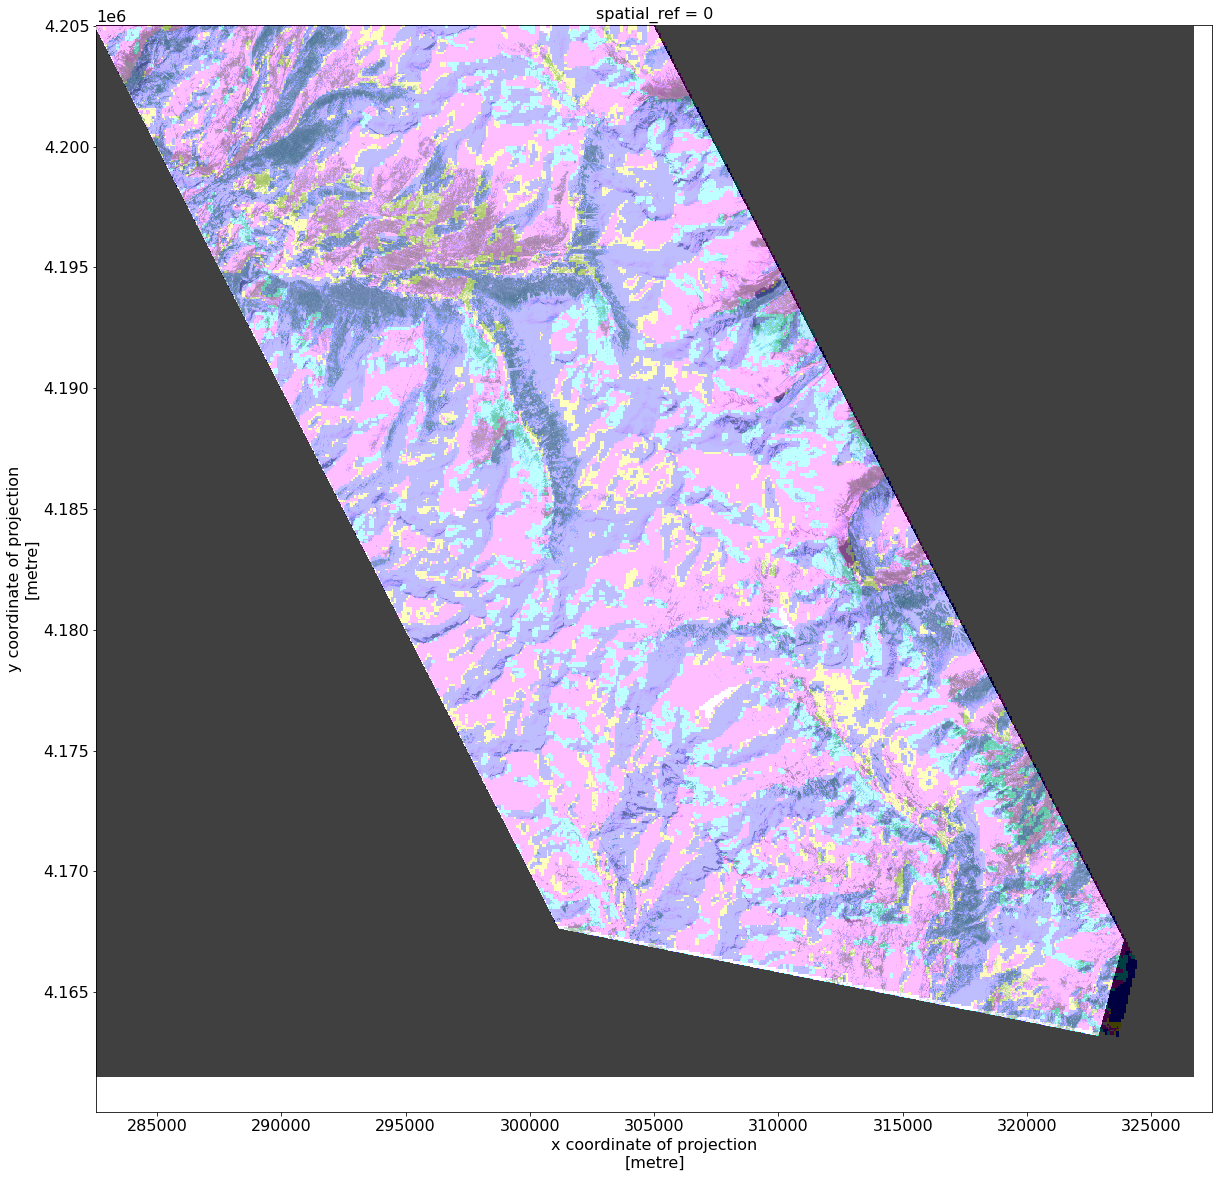

In [67]:
plt.figure(figsize=(20,20))

# magenta
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade > solar_k).where(ds.sat_hillshade > sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='spring')
# yellow
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade > solar_k).where(ds.sat_hillshade <= sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='spring_r')
# blue/purple
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade <= solar_k).where(ds.sat_hillshade <= sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='winter')
# cyan
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade <= solar_k).where(ds.sat_hillshade > sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='cool')



ds_vis.rio.clip(geometry).plot.imshow(rgb="band", vmin=0,vmax=255, alpha=0.75, zorder=99)

number of pixels:  46510 8312 45915 9039
fraction of area:  0.42368095029879027 0.07571782538988486 0.41826082203760384 0.08234040227372103
means:  272.4 271.5 270.1 271.6


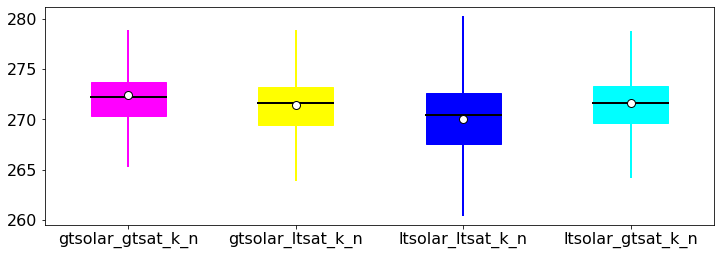

In [69]:
n=26

gtsolar_gtsat_k_n = gtsolar_gtsat_k[n][~np.isnan(gtsolar_gtsat_k[n])]
gtsolar_ltsat_k_n = gtsolar_ltsat_k[n][~np.isnan(gtsolar_ltsat_k[n])]
ltsolar_ltsat_k_n = ltsolar_ltsat_k[n][~np.isnan(ltsolar_ltsat_k[n])]
ltsolar_gtsat_k_n = ltsolar_gtsat_k[n][~np.isnan(ltsolar_gtsat_k[n])]

plt.figure(figsize=(12,4))

bplot = plt.boxplot([gtsolar_gtsat_k_n,
                     gtsolar_ltsat_k_n,
                     ltsolar_ltsat_k_n,
                     ltsolar_gtsat_k_n],
                     showfliers=False, showmeans=True, patch_artist=True,
                     labels=['gtsolar_gtsat_k_n', 'gtsolar_ltsat_k_n', 'ltsolar_ltsat_k_n', 'ltsolar_gtsat_k_n']);


color1='magenta'
color2='yellow'
color3 = 'blue'
color4 = 'cyan'
# fill with colors
colors = [color1, color2, color3, color4]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_edgecolor(color)
    patch.set_facecolor(color)
colors = ['k', 'k', 'k', 'k']
for patch, color in zip(bplot['medians'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['means'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markerfacecolor('w')
    patch.set_marker('o')
    patch.set_markersize(8)
for patch, color in zip(bplot['fliers'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markersize(1)
    patch.set_marker('.')
colors = [color1, color1, color2, color2, color3, color3, color4, color4]
for patch, color in zip(bplot['whiskers'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['caps'], colors):
    patch.set_color(color)
    patch.set_linewidth(0)
    
    
    
#plt.title(times[n])
#plt.ylim(260,280);

print('number of pixels: ',len(gtsolar_gtsat_k_n),len(gtsolar_ltsat_k_n),len(ltsolar_ltsat_k_n),len(ltsolar_gtsat_k_n))
total_px = len(gtsolar_gtsat_k_n)+len(gtsolar_ltsat_k_n)+len(ltsolar_ltsat_k_n)+len(ltsolar_gtsat_k_n)
print('fraction of area: ',len(gtsolar_gtsat_k_n)/total_px,len(gtsolar_ltsat_k_n)/total_px,len(ltsolar_ltsat_k_n)/total_px,len(ltsolar_gtsat_k_n)/total_px)

print('means: ',np.round(np.mean(gtsolar_gtsat_k_n),1),
                np.round(np.mean(gtsolar_ltsat_k_n),1),
                np.round(np.mean(ltsolar_ltsat_k_n),1),
                np.round(np.mean(ltsolar_gtsat_k_n),1))
#print(f'mean diff: {np.round(np.mean(gt_k_n)-np.mean(lt_k_n),1)}')
#print('medians: ',np.round(np.median(gt_k_n),1),np.round(np.median(lt_k_n),1))